# Project Milestone 2
### From Book to movie : An analysis of book adaptation in the cinema industry

### First, let's import the required libraries and load the data for the analysis : 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import re
import ast

import statsmodels.formula.api as smf

In [2]:
# Load movie data
movie_df = pd.read_csv("data/final_movie_metadata.csv").drop('Unnamed: 0', axis=1)

#For genres, replace spaces with commas only if they are not within single quotes
# It will be useful later to split the genres of each movie 
movie_df['movie_genres'] = movie_df['movie_genres'].apply(lambda x: ast.literal_eval(re.sub(r"\s+(?=(?:(?:[^']*'){2})*[^']*$)", ',', x)))
display(movie_df)

,movie_wikipedia_id,cmu_movie_title,movie_release_date,movie_box_office_revenue,runtime,movie_languages,movie_countries,movie_genres,movie_wikidata_id,imdb_id,movie_rating,numVotes,movie_release_year
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,['English Language'],['United States of America'],"[Thriller, Science Fiction, Horror, Adventure,...",Q261700,228333.0,4.9,56854.0,2001.0
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,['English Language'],['United States of America'],"[Mystery, Biographical film, Drama, Crime Drama]",Q16250726,245916.0,6.0,69.0,2000.0
2,28463795,Brun bitter,1988,NaN,83.0,['Norwegian Language'],['Norway'],"[Crime Fiction, Drama]",Q4978832,94806.0,5.6,40.0,1988.0
3,9363483,White Of The Eye,1987,NaN,110.0,['English Language'],['United Kingdom'],"[Thriller, Erotic thriller, Psychological thri...",Q7995657,94320.0,6.1,2888.0,1987.0
4,261236,A Woman in Flames,1983,NaN,106.0,['German Language'],['Germany'],[Drama],Q869644,83949.0,6.0,621.0,1983.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81906,35228177,Mermaids: The Body Found,2011-03-19,NaN,120.0,['English Language'],['United States of America'],[Drama],Q6819873,1816585.0,4.6,1710.0,2011.0
81907,34980460,Knuckle,2011-01-21,NaN,96.0,['English Language'],['Ireland' 'United Kingdom'],"[Biographical film, Drama, Documentary]",Q12125420,1606259.0,6.8,3191.0,2011.0
81908,9971909,Another Nice Mess,1972-09-22,NaN,66.0,['English Language'],['United States of America'],"[Satire, Comedy]",Q4770308,362411.0,5.8,110.0,1972.0
81909,913762,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,['Japanese Language'],['Japan'],"[Science Fiction, Japanese Movies, Adventure, ...",Q2663931,NaN,NaN,NaN,1992.0


In [3]:
# Load csv containing movie_wikipedia_id and corresponding book_wikidata_id (for movies based on books)
movie_book_df = pd.read_csv("data/movie_book.csv")
display(movie_book_df)

,movie_wikipedia_id,book_wikidata_id
0,2205704,Q480
1,7379134,Q480
2,10117133,Q480
3,16233994,Q480
4,21447227,Q480
...,...,...
4652,32989529,Q120911074
4653,61191,Q121775426
4654,6851697,Q122186265
4655,2069950,Q119424284


### We can now merge the movie dataframe with movie_book dataframe :

In [4]:
# Merge data
movie_merged_df = movie_df.merge(movie_book_df, left_on="movie_wikipedia_id", right_on="movie_wikipedia_id", how='left')

# Add a boolean column 'adaptation' (True if the movie is based on a book, False otherwise)
movie_merged_df['adaptation'] = movie_merged_df['book_wikidata_id'].notnull()
display(movie_merged_df)

,movie_wikipedia_id,cmu_movie_title,movie_release_date,movie_box_office_revenue,runtime,movie_languages,movie_countries,movie_genres,movie_wikidata_id,imdb_id,movie_rating,numVotes,movie_release_year,book_wikidata_id,adaptation
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,['English Language'],['United States of America'],"[Thriller, Science Fiction, Horror, Adventure,...",Q261700,228333.0,4.9,56854.0,2001.0,NaN,False
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,['English Language'],['United States of America'],"[Mystery, Biographical film, Drama, Crime Drama]",Q16250726,245916.0,6.0,69.0,2000.0,NaN,False
2,28463795,Brun bitter,1988,NaN,83.0,['Norwegian Language'],['Norway'],"[Crime Fiction, Drama]",Q4978832,94806.0,5.6,40.0,1988.0,NaN,False
3,9363483,White Of The Eye,1987,NaN,110.0,['English Language'],['United Kingdom'],"[Thriller, Erotic thriller, Psychological thri...",Q7995657,94320.0,6.1,2888.0,1987.0,NaN,False
4,261236,A Woman in Flames,1983,NaN,106.0,['German Language'],['Germany'],[Drama],Q869644,83949.0,6.0,621.0,1983.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82020,35228177,Mermaids: The Body Found,2011-03-19,NaN,120.0,['English Language'],['United States of America'],[Drama],Q6819873,1816585.0,4.6,1710.0,2011.0,NaN,False
82021,34980460,Knuckle,2011-01-21,NaN,96.0,['English Language'],['Ireland' 'United Kingdom'],"[Biographical film, Drama, Documentary]",Q12125420,1606259.0,6.8,3191.0,2011.0,NaN,False
82022,9971909,Another Nice Mess,1972-09-22,NaN,66.0,['English Language'],['United States of America'],"[Satire, Comedy]",Q4770308,362411.0,5.8,110.0,1972.0,NaN,False
82023,913762,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,['Japanese Language'],['Japan'],"[Science Fiction, Japanese Movies, Adventure, ...",Q2663931,NaN,NaN,NaN,1992.0,NaN,False


### Since a movie can be adapted from multiple books, let's keep one book per adaptation for now :

In [5]:
# Keep the first adaptation
movie_merged_df.drop_duplicates(subset='movie_wikipedia_id', keep='first', inplace=True)

### One movie has multiple genre, let's create a dataframe with all genres :

In [6]:
# Get the movie genre dataframe (1 movie has multiple genre)
movie_genre_df = movie_merged_df[['movie_wikipedia_id','movie_genres']].explode(['movie_genres']).copy(deep=True)
display(movie_genre_df)

,movie_wikipedia_id,movie_genres
0,975900,Thriller
0,975900,Science Fiction
0,975900,Horror
0,975900,Adventure
0,975900,Supernatural
...,...,...
82023,913762,Drama
82024,12476867,Thriller
82024,12476867,Horror
82024,12476867,Slasher


### To begin with, we can ask ourselves if movies based on books are "better". In order to quantify this, let's have look to the box-office revenue of the movies.

Before starting to analyze deeper the box-office revenue, it is important to check the proportion of missing data :

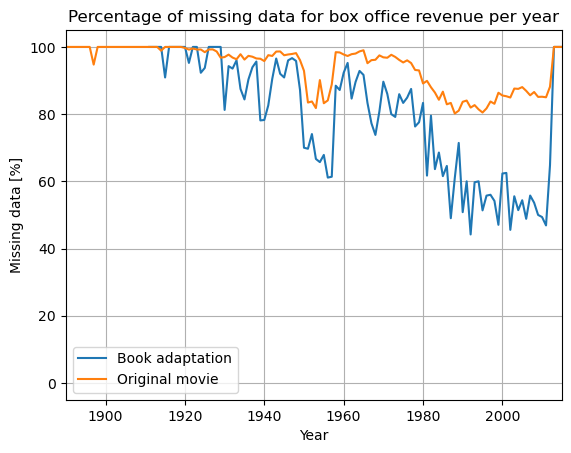

In [7]:
# Compute proportion of missing values over the years
missing_revenue_adaptation = movie_merged_df.query('adaptation == True').groupby('movie_release_year')['movie_box_office_revenue'].apply(lambda x: (x.isna().sum()/len(x) * 100))
missing_revenue_original = movie_merged_df.query('adaptation == False').groupby('movie_release_year')['movie_box_office_revenue'].apply(lambda x: (x.isna().sum()/len(x) * 100))

# Plot
plt.plot(missing_revenue_adaptation.index, missing_revenue_adaptation.values, label='Book adaptation')
plt.plot(missing_revenue_original.index, missing_revenue_original.values, label='Original movie')
plt.xlabel('Year')
plt.ylabel('Missing data [%]')
plt.title('Percentage of missing data for box office revenue per year')
plt.xlim([1890, 2015])
plt.legend()
plt.grid()

We observe a large number of missing data for the box-office revenue : before 1920, we have almost no data. According to this plot, we can try to analyze the box-office revenue of the movies between 1980 and 2010, where the proportion of missing data is the lowest (around 50% for movies based on books, and 80% for the other movies). Note that we observe a lower proportion of missing values for movies based on books, it may be because they are having more importance.

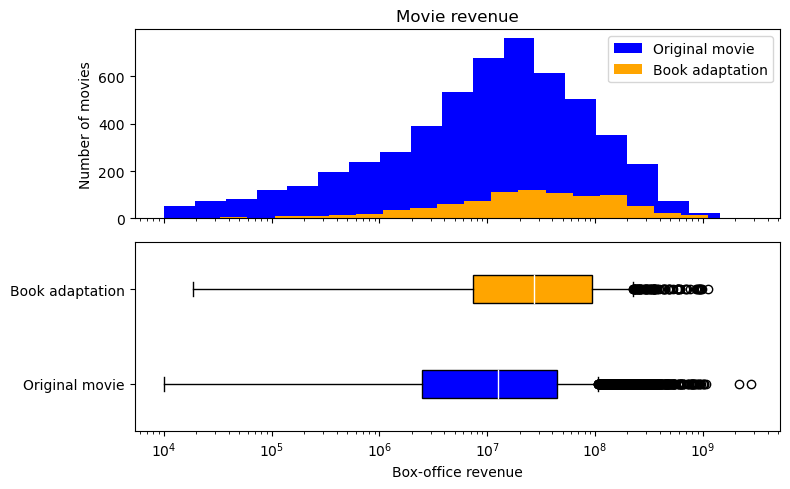

In [8]:
# Filter movie dataframe to analyze the revenue between 1980 and 2010
movie_revenue_df = movie_merged_df.query('movie_release_year >= 1980 & movie_release_year <= 2010')

# Plot histograms and boxplots of the revenue
fig, axs = plt.subplots(figsize=((8, 5)), nrows=2, ncols=1, sharex=True)
axs[0].hist(movie_revenue_df.query('adaptation==False')['movie_box_office_revenue'].dropna(), bins=np.logspace(
    np.log10(movie_revenue_df.query('adaptation==False')['movie_box_office_revenue'].min()),
    np.log10(movie_revenue_df.query('adaptation==False')['movie_box_office_revenue'].max()),
    num=20, base=10), color='blue')
axs[0].hist(movie_revenue_df.query('adaptation==True')['movie_box_office_revenue'].dropna(), bins=np.logspace(
    np.log10(movie_revenue_df.query('adaptation==True')['movie_box_office_revenue'].min()),
    np.log10(movie_revenue_df.query('adaptation==True')['movie_box_office_revenue'].max()),
    num=20, base=10), color='orange')
axs[0].set_xscale('log')
axs[0].legend(['Original movie', 'Book adaptation'])
axs[0].set_ylabel("Number of movies")
axs[0].set_title("Movie revenue")

axs[1].boxplot(movie_revenue_df.query('adaptation==False')['movie_box_office_revenue'].dropna(), positions=[1], vert=False, widths=0.3, 
               patch_artist=True, boxprops=dict(facecolor='blue'), medianprops=dict(color='white'))
axs[1].boxplot(movie_revenue_df.query('adaptation==True')['movie_box_office_revenue'].dropna(), positions=[2], vert=False, widths=0.3, 
               patch_artist=True, boxprops=dict(facecolor='orange'), medianprops=dict(color='white'))
axs[1].set_yticks([1, 2])
axs[1].set_yticklabels(['Original movie', 'Book adaptation'])
axs[1].set_xlabel("Box-office revenue")

plt.tight_layout()

Then, we can perform a t-test to compare the box-office revenue of movies based on books and original movies :

In [9]:
st.ttest_ind(movie_revenue_df.query('adaptation==True')['movie_box_office_revenue'].dropna(),
             movie_revenue_df.query('adaptation==False')['movie_box_office_revenue'].dropna())

TtestResult(statistic=7.253950434225687, pvalue=4.539245082979025e-13, df=6235.0)

We obtain a really small p-values (smaller than 0.05), meaning that the mean box-office revenues for movies based on books and original movies are not the same. The positive result of the t-test says that, in general, box office revenue is higher for movies based on books.

Let's now analyze, for instance, the Science-Fiction genre :

In [10]:
# Create the science fiction dataframe
SF_df = movie_merged_df[movie_merged_df['movie_wikipedia_id'].isin(movie_genre_df.query("movie_genres == 'Science Fiction'")['movie_wikipedia_id'])]

# Compute the proportion of adaptation in science fiction genre
SF_percent_adaptation = SF_df.query('adaptation == True')['adaptation'].count()/len(SF_df)*100
print("In Science Fiction movies, the percentage of adaptation is %.3f%%" %SF_percent_adaptation)

In Science Fiction movies, the percentage of adaptation is 10.371%


We can analyze the box-office revenue between 1980 and 2010 for the Science-Fiction genre :

In [11]:
# Filter between 1980 and 2010
SF_revenue = SF_df.query('movie_release_year >= 1980 & movie_release_year <= 2010')

# Perform a t-test
st.ttest_ind(SF_revenue.query('adaptation == True')['movie_box_office_revenue'].dropna(),
             SF_revenue.query('adaptation == False')['movie_box_office_revenue'].dropna())

TtestResult(statistic=0.8320088249522644, pvalue=0.4057933638874385, df=510.0)

The high p-value means that we can not reject the hypothesis that box-office revenue is the same for all science-fiction movies. Interesting, in some genre, the fact that the movie is based on a book may not influence the box office revenue. This illustrates a Simpson's paradox, we will need to be careful and analyze genres separately.

### We have to keep in mind that, even if we filtered the data between 1980 and 2010, we have a large number of missing values for the box-office revenue. Let's see if we have more data for the movies rating !

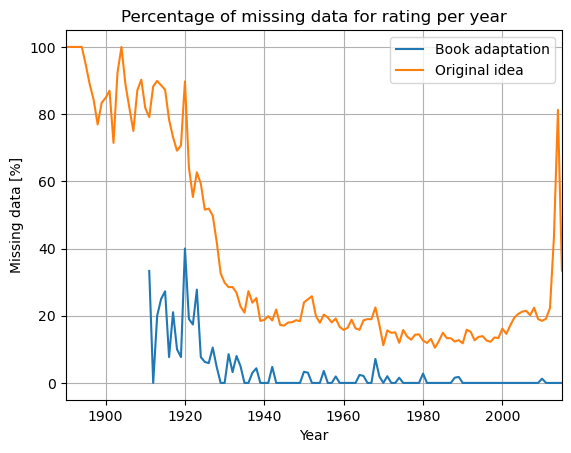

In [12]:
# Compute proportion of missing values for movie rating over the years
missing_rating_adaptation = movie_merged_df.query('adaptation == True').groupby('movie_release_year')['movie_rating'].apply(lambda x: (x.isna().sum()/len(x) * 100))
missing_rating_original = movie_merged_df.query('adaptation == False').groupby('movie_release_year')['movie_rating'].apply(lambda x: (x.isna().sum()/len(x) * 100))

# Plot
plt.plot(missing_rating_adaptation.index, missing_rating_adaptation.values, label='Book adaptation')
plt.plot(missing_rating_original.index, missing_rating_original.values, label='Original idea')
plt.xlabel('Year')
plt.ylabel('Missing data [%]')
plt.title('Percentage of missing data for rating per year')
plt.xlim([1890, 2015])
plt.legend()
plt.grid()

That's better, we have a low proportion of missing data for the movie rating ! According the following plot, let's analyze the movie rating between 1940 and 2010, where the proportion of missing data is close to zero for movies based on books and around 15% for the other movies. Note that, as for the box-office revenue, we have a lower number of missing data for adapted movies.

Let's perform the same analysis for the rating :

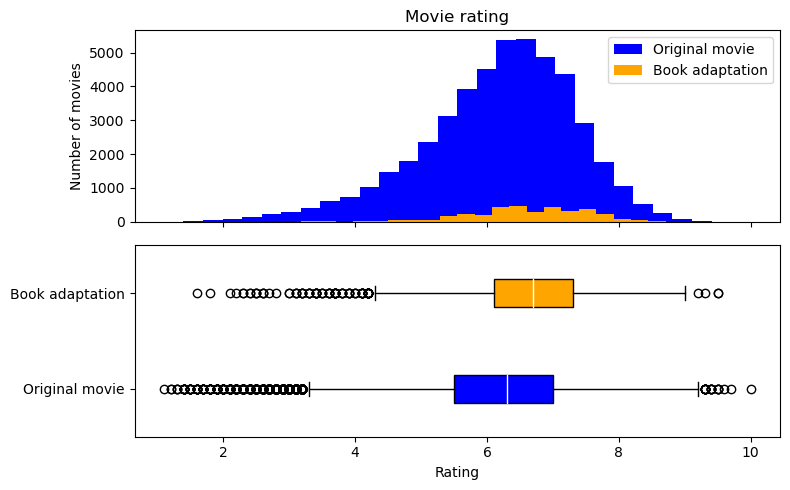

In [13]:
# Filter movie dataframe to analyze the rating between 1940 and 2010
movie_rating_df = movie_merged_df.query('movie_release_year >= 1940 & movie_release_year <= 2010')

# Plot histograms and boxplots of the rating
fig, axs = plt.subplots(figsize=((8, 5)), nrows=2, ncols=1, sharex=True)
axs[0].hist(movie_rating_df.query('adaptation==False')['movie_rating'].dropna(), bins=30, alpha=1, color='blue')
axs[0].hist(movie_rating_df.query('adaptation==True')['movie_rating'].dropna(), bins=30, alpha=1, color='orange')
axs[0].legend(['Original movie', 'Book adaptation'])
axs[0].set_ylabel("Number of movies")
axs[0].set_title("Movie rating")

axs[1].boxplot(movie_rating_df.query('adaptation==False')['movie_rating'].dropna(), positions=[1], vert=False, widths=0.3, 
               patch_artist=True, boxprops=dict(facecolor='blue'), medianprops=dict(color='white'))
axs[1].boxplot(movie_rating_df.query('adaptation==True')['movie_rating'].dropna(), positions=[2], vert=False, widths=0.3, 
               patch_artist=True, boxprops=dict(facecolor='orange'), medianprops=dict(color='white'))
axs[1].set_yticks([1, 2])
axs[1].set_yticklabels(['Original movie', 'Book adaptation'])
axs[1].set_xlabel("Rating")

plt.tight_layout()

In [14]:
st.ttest_ind(movie_rating_df.query('adaptation==True')['movie_rating'].dropna(),
             movie_rating_df.query('adaptation==False')['movie_rating'].dropna())

TtestResult(statistic=20.520737696873553, pvalue=3.344300429248849e-93, df=51108.0)

As for the box-office revenue, the very p-value allows us to say that the rating of adapted movies and original movies is not the same. According to the result of the test, in general movies based on books have higher ratings.

In [15]:
SF_rating = SF_df.query('movie_release_year >= 1940 & movie_release_year <= 2010')
st.ttest_ind(SF_rating.query('adaptation==True')['movie_rating'].dropna(),
             SF_rating.query('adaptation==False')['movie_rating'].dropna())

TtestResult(statistic=9.851655452881001, pvalue=1.9525503206558535e-22, df=2196.0)

For the Science-Fiction genre, the t-test for the box office revenue did not allow us to draw any conclusions. For the ratings, we obtain a really small p-value and results say that adaptations have better ratings than original ideas. This difference in conclusions for box office revenue and ratings shows that they are different metrics. The former is a metric of affluence, while the latter is a metric of appreciation. Deeper analysis may be required to better assess this conclusion.

However in general it seems like movies based on books have higher box-office revenues and higher the ratings. Let's now see if it is the case in the different movie genres.

## Analysis of the movie genres

Let's look what genres have the largest number of movies :

In [16]:
# Show the number of movies within each genre
print('The 15 first genres with the largest number of movies :')
movie_genre_df.groupby('movie_genres').count().rename(columns={'movie_wikipedia_id' : 'number of movies'}).sort_values(by='number of movies', 
                                                                                                                       ascending=False).head(15)

The 15 first genres with the largest number of movies :


,number of movies
movie_genres,
Drama,33934
Comedy,16193
Romance Film,10225
Black-and-white,9074
Action,8785
Thriller,8728
Short Film,8062
World cinema,7119
Crime Fiction,6926


In [17]:
# Function to obtain a dataframe for a certain genre
def select_genre(query_genre):
    genre_subset = movie_genre_df[movie_genre_df['movie_genres'].notna()]
    return movie_merged_df[movie_merged_df['movie_wikipedia_id']
                           .isin(genre_subset[genre_subset['movie_genres'].str.contains(query_genre)]['movie_wikipedia_id'])]


drama_df = select_genre(query_genre='Drama')
comedy_df = select_genre(query_genre='Comedy')
romance_df = select_genre(query_genre='Romance')
black_white_df = select_genre(query_genre='Black-and-white')
action_df = select_genre(query_genre='Action')
thriller_df = select_genre(query_genre='Thriller')
short_df = select_genre(query_genre='Short Film')
horror_df = select_genre(query_genre='Horror')
adventure_df = select_genre(query_genre='Adventure')
SF_df = select_genre(query_genre='Science Fiction')

Let's compute the proportion of adaptation within some of the top genres :

In [18]:
# Make a dataframe with some top genres and proportion of adaptation
genre_df = pd.DataFrame({'movie_genre' : ['Drama', 'Comedy', 'Romance', 'B&W', 'Action', 'Thriller', 
                                          'Short', 'Adventure', 'Science Fiction', 'Horror']})
genre_df['adaptation_proportion'] = [drama_df.query('adaptation == True')['adaptation'].count()/len(drama_df)*100,
                                     comedy_df.query('adaptation == True')['adaptation'].count()/len(comedy_df)*100,
                                     romance_df.query('adaptation == True')['adaptation'].count()/len(romance_df)*100,
                                     black_white_df.query('adaptation == True')['adaptation'].count()/len(black_white_df)*100,
                                     action_df.query('adaptation == True')['adaptation'].count()/len(action_df)*100,
                                     thriller_df.query('adaptation == True')['adaptation'].count()/len(thriller_df)*100,
                                     short_df.query('adaptation == True')['adaptation'].count()/len(short_df)*100,
                                     adventure_df.query('adaptation == True')['adaptation'].count()/len(adventure_df)*100,
                                     SF_df.query('adaptation == True')['adaptation'].count()/len(SF_df)*100,
                                     horror_df.query('adaptation == True')['adaptation'].count()/len(horror_df)*100,]

# Sort by the proportion of adaptation
genre_df[['movie_genre', 'adaptation_proportion']].sort_values(by='adaptation_proportion', ascending=False)

,movie_genre,adaptation_proportion
8,Science Fiction,10.371362
5,Thriller,9.964492
7,Adventure,9.943542
0,Drama,8.522711
2,Romance,8.334962
9,Horror,7.373185
3,B&W,6.498790
4,Action,6.188732
1,Comedy,3.817513
6,Short,0.272885


In [19]:
# Create a dataframe by splitting the genres of all movies
genre_explode_df = movie_genre_df.merge(movie_merged_df, on='movie_wikipedia_id', how='left').drop('movie_genres_y',axis=1).rename(columns={'movie_genres_x' : 'movie_genre'}).copy()
genre_explode_df = genre_explode_df.query('movie_genre.notna()')

We can now analyze the box-office revenue and the rating for the genres with the highest proportion of adaptations :

Text(0.5, 1.0, 'Box office revenue by genre')

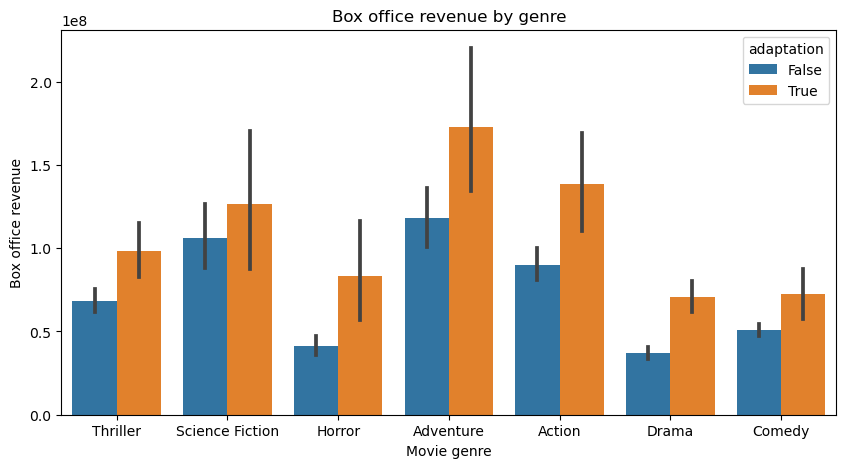

In [20]:
# Filter to analyze the revenue between 1980 and 2010
genre_explode_revenue = genre_explode_df.query('movie_release_year >= 1980 & movie_release_year <= 2010')

# Genres of interest
genres_of_interest = ['Science Fiction', 'Thriller', 'Adventure', 'Drama', 'Romance', 'Horror', 'Action', 'Comedy']
 
# Plot
plt.subplots(figsize=(10, 5))
sns.barplot(x='movie_genre', y='movie_box_office_revenue', hue='adaptation', 
            data=genre_explode_revenue.loc[genre_explode_revenue['movie_genre'].isin(genres_of_interest)],errorbar=('ci',95))
plt.xlabel('Movie genre')
plt.ylabel('Box office revenue')
plt.title('Box office revenue by genre')
#plt.grid()


Note that on each bar the 95% confidence interval is shown.

Text(0.5, 1.0, 'Movie rating by genre')

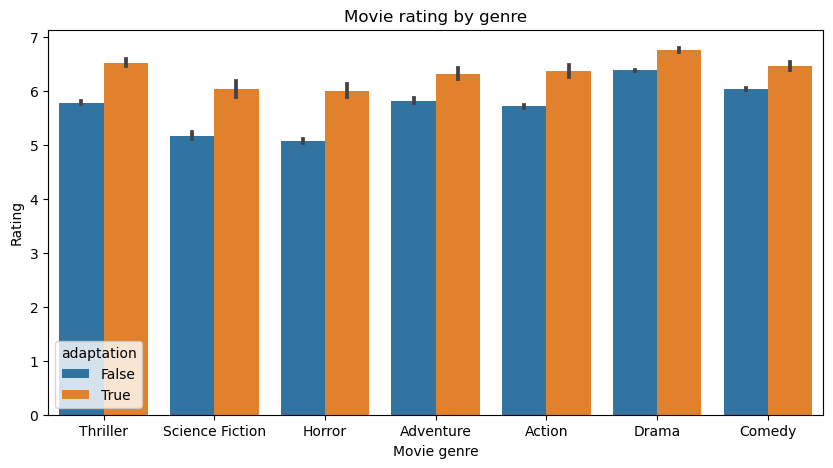

In [21]:
# Filter to analyze the rating between 1940 and 2010
genre_explode_rating = genre_explode_df.query('movie_release_year >= 1940 & movie_release_year <= 2010')

# Plot
plt.subplots(figsize=(10, 5))
sns.barplot(x='movie_genre', y='movie_rating', hue='adaptation', 
            data=genre_explode_rating.loc[genre_explode_rating['movie_genre'].isin(genres_of_interest)])
plt.xlabel('Movie genre')
plt.ylabel('Rating')
plt.title('Movie rating by genre')
#plt.grid()

Based on the analysis of the box-office revenue anf the rating, we conclude that for the main genres, movies based on books perform better.

## Which Books make successful Movies
We'll examine various books adapted into movies to understand which book category (e.g. Part of a series, Children book, ...) yield the highest movie revenue. Initially, we'll create visualizations for a basic overview of the dataset, followed by a detailed analysis in the final project.

First let us load the book_adaptation dataframe created in the notebook `create_dataset.ipynb`. As our metric is revenue, we only consider books for which we the revenue of the respective adaptation is not null. 

In [22]:
book_adaptation_df = (pd.read_csv("data/book_adaptation.csv")
                      .query('book_title.notna() & movie_revenue.notna()')
                     )
display(book_adaptation_df)

,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,imdb_rating,imdb_total_votes,movie_budget,...,book_horror,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_pages,book_rating,book_total_ratings,movie_is_adaptation
132,The Great Santini,1979.0,1.610553e+07,115.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02h8pkk"": ""Family Drama"", ""/m/07s9rl0"": ""...",7.2,6815.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True
176,Straw Dogs,1971.0,6.552486e+07,118.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/07s9rl0"": ""Drama""}",7.4,63535.0,1.293003e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True
227,The Dark Half,1993.0,1.740617e+07,122.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/060__y"": ""Film adaptation"", ""/m/03npn"": ""...",6.0,18946.0,2.460547e+07,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True
234,Midnight Express,1978.0,1.309930e+08,121.0,"{""/m/064_8sq"": ""French Language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/0hn10"": ""LGBT"", ...",7.5,86615.0,8.608109e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True
252,The Forbidden Kingdom,2008.0,1.417444e+08,105.0,"{""/m/0653m"": ""Standard Mandarin"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/08322"": ""Wuxia"", ""/m/0hj3n2k"": ""Fantasy A...",6.5,108645.0,6.095026e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81858,Dead Man Walking,1995.0,1.293126e+08,122.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",7.5,100033.0,1.711960e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True
81864,Noises Off...,1992.0,3.862151e+06,103.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0gf28"": ""Parody"", ""/m/01z4y"": ""Comedy"", ""...",7.4,12002.0,2.032579e+07,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,True
81913,Norwegian Wood,2010.0,1.903854e+07,133.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""...",6.3,12290.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True
81944,How to Eat Fried Worms,2006.0,1.538269e+07,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/07s9rl0"": ""Dra...",5.3,5885.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True


When we think about movie adaptations, predominately movies about book series such as Harry Potter or Lord of the Rings come to mind. So let's see if book series perform better on the box office. 

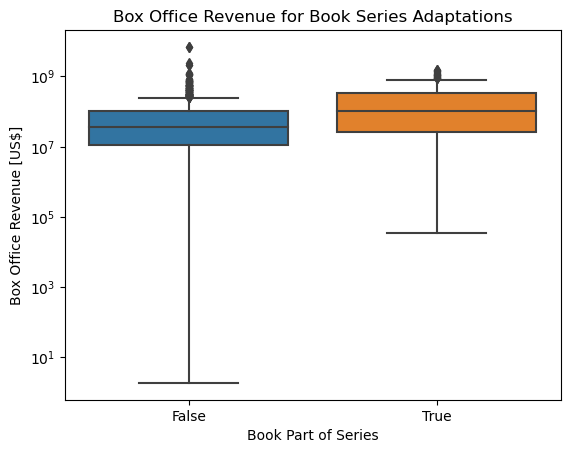

In [23]:
sns.boxplot(x='book_part_of_series', y='movie_revenue', data=book_adaptation_df.assign(book_part_of_series=book_adaptation_df['book_part_of_series'].astype(bool)))
plt.yscale('log')
plt.title('Box Office Revenue for Book Series Adaptations')
plt.xlabel('Book Part of Series')
plt.ylabel('Box Office Revenue [US$]')
plt.show()

Indeed, it seems like movies that adapt books that are part of a series generate more revenue. Let's perform a t-test to verify this:


In [24]:
#st.ttest_ind(book_adaptation_df.assign(book_part_of_series=book_adaptation_df['book_part_of_series'].astype(bool).query())
st.ttest_ind(book_adaptation_df.query('book_part_of_series==1')['movie_revenue'],book_adaptation_df.query('book_part_of_series==0')['movie_revenue'])       


TtestResult(statistic=6.257005059577074, pvalue=5.090136766202264e-10, df=1522.0)

Indeed, the t-test confirms whats was observed.

### Let's have a look at the ratings for series adaptations

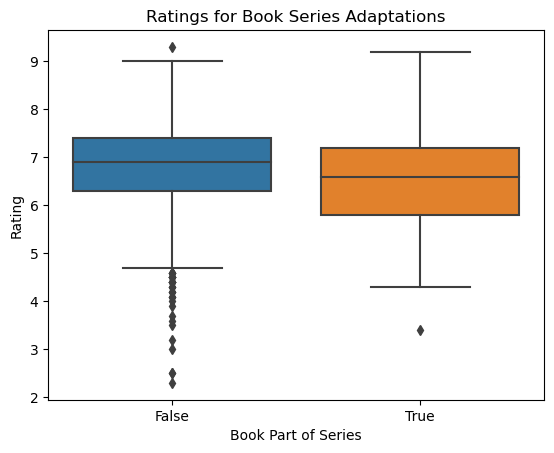

In [25]:
sns.boxplot(x='book_part_of_series', y='imdb_rating', data=book_adaptation_df.assign(book_part_of_series=book_adaptation_df['book_part_of_series'].astype(bool)))
plt.title('Ratings for Book Series Adaptations')
plt.xlabel('Book Part of Series')
plt.ylabel('Rating')
plt.show()

In [26]:
st.ttest_ind(book_adaptation_df.query('book_part_of_series==1')['imdb_rating'],book_adaptation_df.query('book_part_of_series==0')['imdb_rating'])  

TtestResult(statistic=-3.765084033844659, pvalue=0.00017282691537825228, df=1522.0)

This time, it seems like a movie adapted from a series of book has lower ratings. This result shows that even though an adaptation from a series of books may provide more affluence (more revenue), it may not mean that the movie will be better. For deeper causality analysis, the influence of "reading the book" shall not be undermined.

In [32]:
book_adaptation_df = pd.read_csv("data/book_adaptation.csv").query('movie_is_adaptation==True')
book_adaptation_df

,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,imdb_rating,imdb_total_votes,movie_budget,...,book_horror,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_pages,book_rating,book_total_ratings,movie_is_adaptation
11,Lady Snowblood 2: Love Song of Vengeance,1974.0,NaN,89.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",6.3,4081.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True
43,Mysterious Island,1982.0,NaN,100.0,"{""/m/0653m"": ""Standard Mandarin""}","{""/m/03h64"": ""Hong Kong""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/08322"":...",5.4,195.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True
44,Mysterious Island,1982.0,NaN,100.0,"{""/m/0653m"": ""Standard Mandarin""}","{""/m/03h64"": ""Hong Kong""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/08322"":...",5.4,195.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True
83,The Tango Player,1991.0,NaN,96.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",6.2,38.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True
96,The Thirteen Chairs,1969.0,NaN,94.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/03rjj"": ""Italy""}","{""/m/05p553"": ""Comedy film"", ""/m/01z4y"": ""Come...",5.8,658.0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81944,How to Eat Fried Worms,2006.0,1.538269e+07,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/07s9rl0"": ""Dra...",5.3,5885.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True
81961,Sherlock Holmes and the Voice of Terror,1942.0,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",6.4,5061.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,True
81970,Wilde,1997.0,3.173928e+06,118.0,"{""/m/02h40lc"": ""English Language""}","{""/m/014tss"": ""Kingdom of Great Britain"", ""/m/...","{""/m/0hn10"": ""LGBT"", ""/m/017fp"": ""Biography"", ...",6.9,17907.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True
82006,The Luck of the Navy,1927.0,NaN,110.0,{},"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/06ppq"": ""Silent ...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,True


In [41]:
formula_category='imdb_rating ~ C(book_part_of_series)+C(literary_work)+C(written_work)+C(comic_book_seris)+C(book_series)+C(manga_series)+C(book_fiction)+C(book_non_fiction)+C(book_children)'
smf.ols(formula=formula_category,data=book_adaptation_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     14.05
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.38e-22
Time:                        14:43:55   Log-Likelihood:                -6366.5
No. Observations:                4605   AIC:                         1.275e+04
Df Residuals:                    4595   BIC:                         1.282e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         6.5790      0.092     71.452      0.000       6.398       6.760
C(book_part_of_series)[T.1.0]    -0.1956      0.045     -4.347      0.000      -0.284      -0.107
C(literary_work)[T.1.0]           0.0512      0.090      0.567      0.571      -0.126       0.228
C(written_work)[T.1.0]            0.0772      0.088      0.879      0.380      -0.095       0.249
C(comic_book_seris)[T.1.0]       -0.3893      0.166     -2.347      0.019      -0.714      -0.064
C(book_series)[T.1.0]            -0.4888      0.162     -3.018      0.003      -0.806      -0.171
C(manga_series)[T.1.0]           -0.2424      0.141     -1.717      0.086      -0.519       0.034
C(book_fiction)[T.1.0]           -0.1518      0.030     -5.046      0.000      -0.211      -0.093
C(book_non_fiction)[T.1.0]        0.4236      0.075      5.673      0.000       0.277       0.570
C(book_children)[T.1.0]           0.0041      0.073      0.056      0.955      -0.138       0.147
==============================================================================
Omnibus:                      646.583   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1325.402
Skew:                          -0.857   Prob(JB):                    1.56e-288
Kurtosis:                       4.992   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
import sklearn
from sklearn.linear_model import LinearRegression

features=['book_part_of_series', 'literary_work', 'written_work', 'comic_book_seris', 'book_series', 'manga_series', 'book_fiction', 'book_non_fiction', 'book_children']
X=book_adaptation_df[features+['imdb_rating']].dropna()[features]
y=book_adaptation_df[features+['imdb_rating']].dropna()['imdb_rating']


(4605, 9)

In [65]:
model=LinearRegression()
#sklearn.model_selection.cross_validate(model,X,y,cv=10)
def split_set(data_to_split, ratio=0.8):
    mask = np.random.rand(len(data_to_split)) < ratio
    return [data_to_split[mask].reset_index(drop=True), data_to_split[~mask].reset_index(drop=True)]
data_regression=book_adaptation_df[features+['imdb_rating']].dropna()
[data_train, data_test] = split_set(data_regression)
X_train=data_train[features]
X_test=data_test[features]
y_train=data_train['imdb_rating']
y_test=data_test['imdb_rating']

np.shape(y_train)

(3687,)

<BarContainer object of 9 artists>

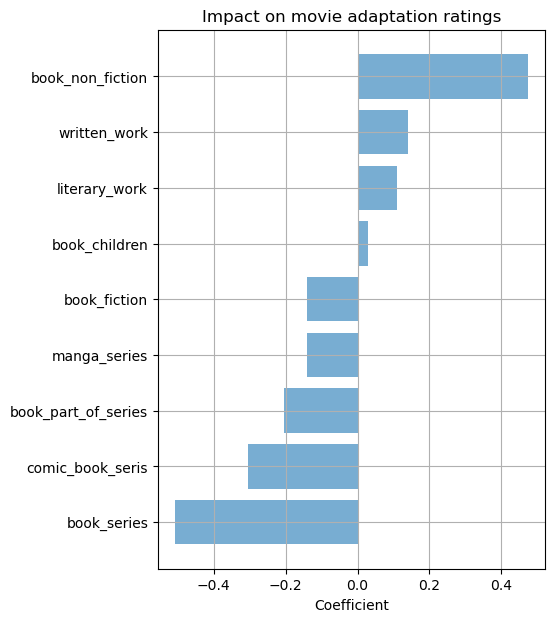

In [89]:
model.fit(X_train,y_train)
coef_df=pd.DataFrame(data=[list(model.coef_),features],index=["Coefficient","Feature name"]).transpose()
coef_df.sort_values(by='Coefficient',inplace=True)
plt.subplots(figsize=(5,7))
plt.grid()
plt.xlabel("Coefficient")
plt.title("Impact on movie adaptation ratings")
plt.barh(coef_df['Feature name'],coef_df['Coefficient'], alpha=0.6)

In [83]:
coef_df

,0,1,2,3,4,5,6,7,8
Coefficient,-0.204762,0.110384,0.1411,-0.304723,-0.506925,-0.14032,-0.139399,0.473718,0.029891
Feature name,book_part_of_series,literary_work,written_work,comic_book_seris,book_series,manga_series,book_fiction,book_non_fiction,book_children
